# Fraud Detection System - Final Project

## Project Overview
This project builds a comprehensive fraud detection system that:
1. **Analyzes** online transaction logs and user behavioral data
2. **Builds and trains** classification models (Logistic Regression, Random Forest) 
3. **Develops** a real-time monitoring dashboard using Streamlit

---

## Step 1: Data Exploration & Analysis
Let's start by loading and exploring our transaction dataset.

In [1]:
# Import required libraries for data exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 1.26.4


In [2]:
# Load the transaction dataset
df = pd.read_csv('synthetic_financial_data.csv')

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
df.info()

Dataset loaded successfully!
Dataset shape: (10000, 11)
Columns: ['transaction_id', 'customer_id', 'merchant_id', 'amount', 'transaction_time', 'is_fraudulent', 'card_type', 'location', 'purchase_category', 'customer_age', 'transaction_description']

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           10000 non-null  int64  
 1   customer_id              10000 non-null  int64  
 2   merchant_id              10000 non-null  int64  
 3   amount                   10000 non-null  float64
 4   transaction_time         10000 non-null  object 
 5   is_fraudulent            10000 non-null  int64  
 6   card_type                10000 non-null  object 
 7   location                 10000 non-null  object 
 8   purchase_category        10000 non-null  object 
 9   customer_age             

In [3]:
# Display first few rows
print("FIRST 5 ROWS:")
print("="*50)
display(df.head())

print("\nLAST 5 ROWS:")
print("="*50)
display(df.tail())

print("\nBASIC STATISTICS:")
print("="*50)
display(df.describe())

FIRST 5 ROWS:


,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
0,1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027
1,2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053
2,3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035
3,4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037
4,5,1036,2083,1890.10,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083



LAST 5 ROWS:


,transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description
9995,9996,1056,2023,8935.28,2023-01-01 02:46:35,1,MasterCard,City-39,Restaurant,36,Purchase at Merchant-2023
9996,9997,1053,2026,30.15,2023-01-01 02:46:36,0,MasterCard,City-32,Retail,42,Purchase at Merchant-2026
9997,9998,1041,2034,6333.64,2023-01-01 02:46:37,0,American Express,City-1,Online Shopping,36,Purchase at Merchant-2034
9998,9999,1009,2019,2837.13,2023-01-01 02:46:38,1,Visa,City-11,Retail,57,Purchase at Merchant-2019
9999,10000,1082,2070,7209.43,2023-01-01 02:46:39,1,Discover,City-1,Gas Station,50,Purchase at Merchant-2070



BASIC STATISTICS:


,transaction_id,customer_id,merchant_id,amount,is_fraudulent,customer_age
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1051.272300,2050.486600,4958.381617,0.506800,44.047500
std,2886.89568,28.864062,28.877801,2899.699675,0.499979,15.321707
min,1.00000,1001.000000,2001.000000,10.610000,0.000000,18.000000
25%,2500.75000,1026.000000,2025.000000,2438.175000,0.000000,31.000000
50%,5000.50000,1052.000000,2050.000000,4943.945000,1.000000,44.000000
75%,7500.25000,1076.000000,2076.000000,7499.312500,1.000000,57.000000
max,10000.00000,1100.000000,2100.000000,9999.750000,1.000000,70.000000


FRAUD DISTRIBUTION ANALYSIS:
Total transactions: 10,000
Legitimate transactions: 4,932 (49.32%)
Fraudulent transactions: 5,068 (50.68%)


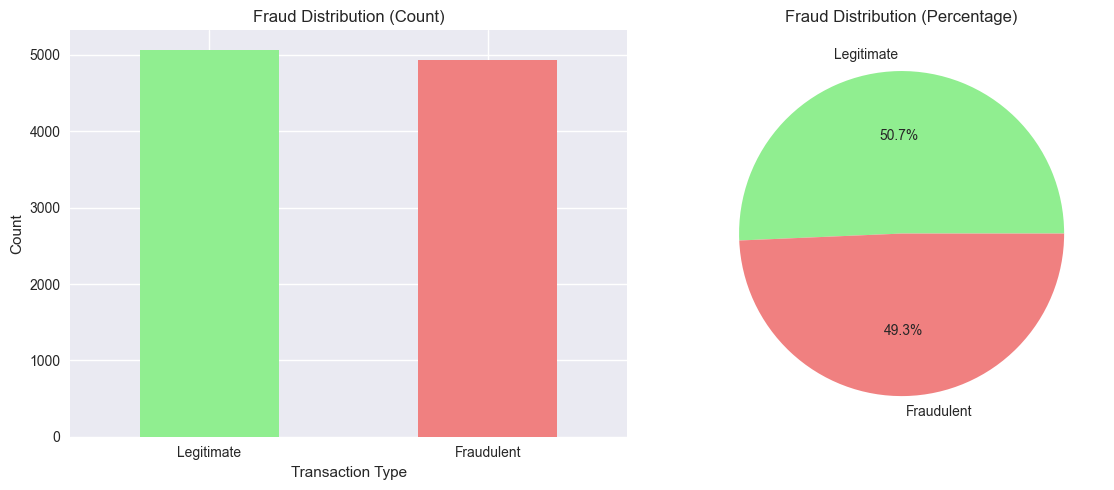

In [4]:
# Analyze the target variable (fraud distribution)
print("FRAUD DISTRIBUTION ANALYSIS:")
print("="*50)

fraud_counts = df['is_fraudulent'].value_counts()
fraud_percentage = df['is_fraudulent'].value_counts(normalize=True) * 100

print(f"Total transactions: {len(df):,}")
print(f"Legitimate transactions: {fraud_counts[0]:,} ({fraud_percentage[0]:.2f}%)")
print(f"Fraudulent transactions: {fraud_counts[1]:,} ({fraud_percentage[1]:.2f}%)")

# Visualize fraud distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
fraud_counts.plot(kind='bar', color=['lightgreen', 'lightcoral'])
plt.title('Fraud Distribution (Count)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Legitimate', 'Fraudulent'], rotation=0)

plt.subplot(1, 2, 2)
plt.pie(fraud_counts.values, labels=['Legitimate', 'Fraudulent'], 
        autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Fraud Distribution (Percentage)')

plt.tight_layout()
plt.show()

## Step 1B: Detailed Pattern Analysis
Let's analyze fraud patterns across different dimensions to understand behavioral patterns.

FRAUD ANALYSIS BY CARD TYPE:
Card Type Fraud Statistics:


,Total_Transactions,Fraud_Count,Fraud_Rate
card_type,,,
American Express,2494,1232,0.494
Discover,2633,1329,0.505
MasterCard,2383,1243,0.522
Visa,2490,1264,0.508


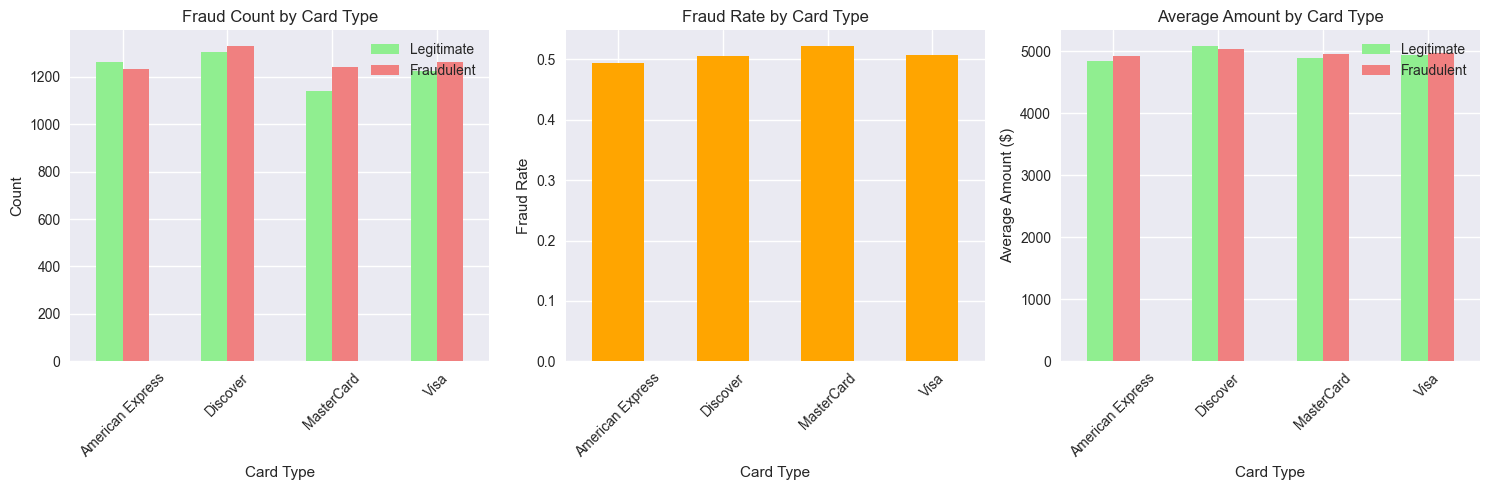

In [5]:
# Analyze fraud patterns by Card Type
print("FRAUD ANALYSIS BY CARD TYPE:")
print("="*50)

card_fraud = df.groupby(['card_type', 'is_fraudulent']).size().unstack(fill_value=0)
card_fraud_pct = df.groupby(['card_type'])['is_fraudulent'].agg(['count', 'sum', 'mean']).round(3)
card_fraud_pct.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']

print("Card Type Fraud Statistics:")
display(card_fraud_pct)

# Visualize fraud by card type
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
card_fraud.plot(kind='bar', ax=plt.gca(), color=['lightgreen', 'lightcoral'])
plt.title('Fraud Count by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.legend(['Legitimate', 'Fraudulent'])
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
card_fraud_pct['Fraud_Rate'].plot(kind='bar', color='orange')
plt.title('Fraud Rate by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
amounts_by_card = df.groupby(['card_type', 'is_fraudulent'])['amount'].mean().unstack()
amounts_by_card.plot(kind='bar', ax=plt.gca(), color=['lightgreen', 'lightcoral'])
plt.title('Average Amount by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Average Amount ($)')
plt.legend(['Legitimate', 'Fraudulent'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

FRAUD ANALYSIS BY PURCHASE CATEGORY:
Purchase Category Fraud Statistics:


,Total_Transactions,Fraud_Count,Fraud_Rate
purchase_category,,,
Groceries,1692,896,0.530
Gas Station,1666,874,0.525
Retail,1661,853,0.514
Travel,1694,856,0.505
Online Shopping,1651,804,0.487
Restaurant,1636,785,0.480


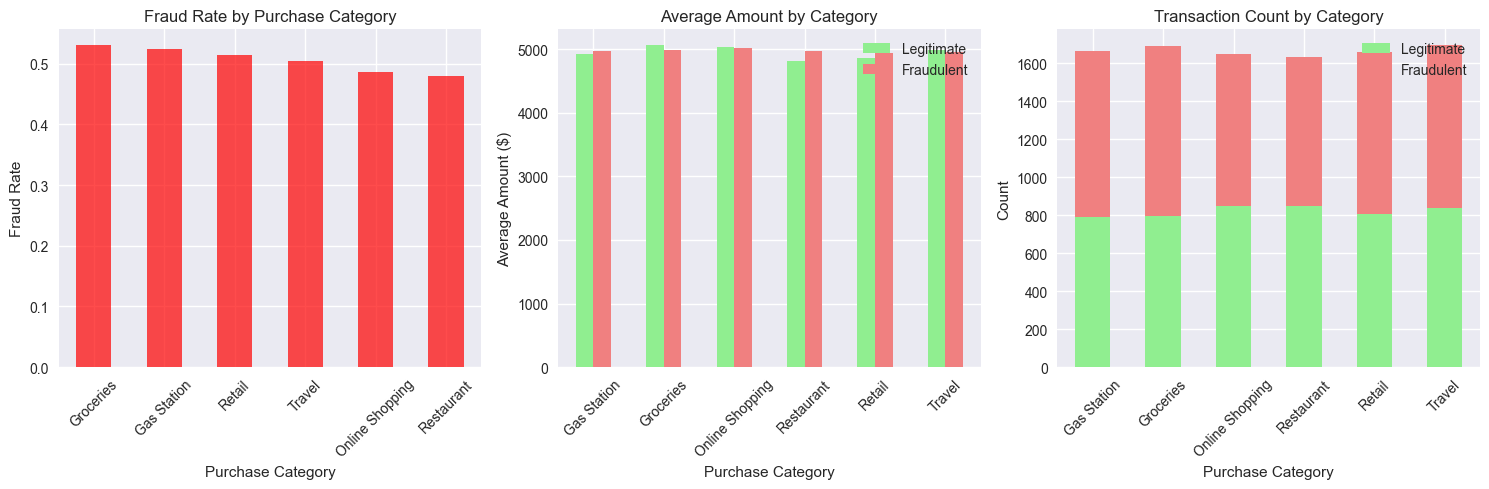

In [6]:
# Analyze fraud patterns by Purchase Category
print("FRAUD ANALYSIS BY PURCHASE CATEGORY:")
print("="*50)

category_fraud = df.groupby(['purchase_category'])['is_fraudulent'].agg(['count', 'sum', 'mean']).round(3)
category_fraud.columns = ['Total_Transactions', 'Fraud_Count', 'Fraud_Rate']
category_fraud = category_fraud.sort_values('Fraud_Rate', ascending=False)

print("Purchase Category Fraud Statistics:")
display(category_fraud)

# Visualize fraud by purchase category
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
category_fraud['Fraud_Rate'].plot(kind='bar', color='red', alpha=0.7)
plt.title('Fraud Rate by Purchase Category')
plt.xlabel('Purchase Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
category_amounts = df.groupby(['purchase_category', 'is_fraudulent'])['amount'].mean().unstack()
category_amounts.plot(kind='bar', ax=plt.gca(), color=['lightgreen', 'lightcoral'])
plt.title('Average Amount by Category')
plt.xlabel('Purchase Category')
plt.ylabel('Average Amount ($)')
plt.legend(['Legitimate', 'Fraudulent'])
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
category_counts = df.groupby(['purchase_category', 'is_fraudulent']).size().unstack(fill_value=0)
category_counts.plot(kind='bar', ax=plt.gca(), color=['lightgreen', 'lightcoral'], stacked=True)
plt.title('Transaction Count by Category')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.legend(['Legitimate', 'Fraudulent'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

AMOUNT AND AGE PATTERN ANALYSIS:
Amount Statistics by Fraud Type:


,count,mean,std,min,25%,50%,75%,max
is_fraudulent,,,,,,,,
0,4932.0,4943.229469,2885.005398,11.33,2450.1100,4958.17,7455.6375,9998.21
1,5068.0,4973.127157,2914.137479,10.61,2421.8225,4922.06,7532.9000,9999.75



Customer Age Statistics by Fraud Type:


,count,mean,std,min,25%,50%,75%,max
is_fraudulent,,,,,,,,
0,4932.0,44.131184,15.270322,18.0,31.0,44.0,57.0,70.0
1,5068.0,43.966062,15.372618,18.0,30.0,44.0,57.0,70.0


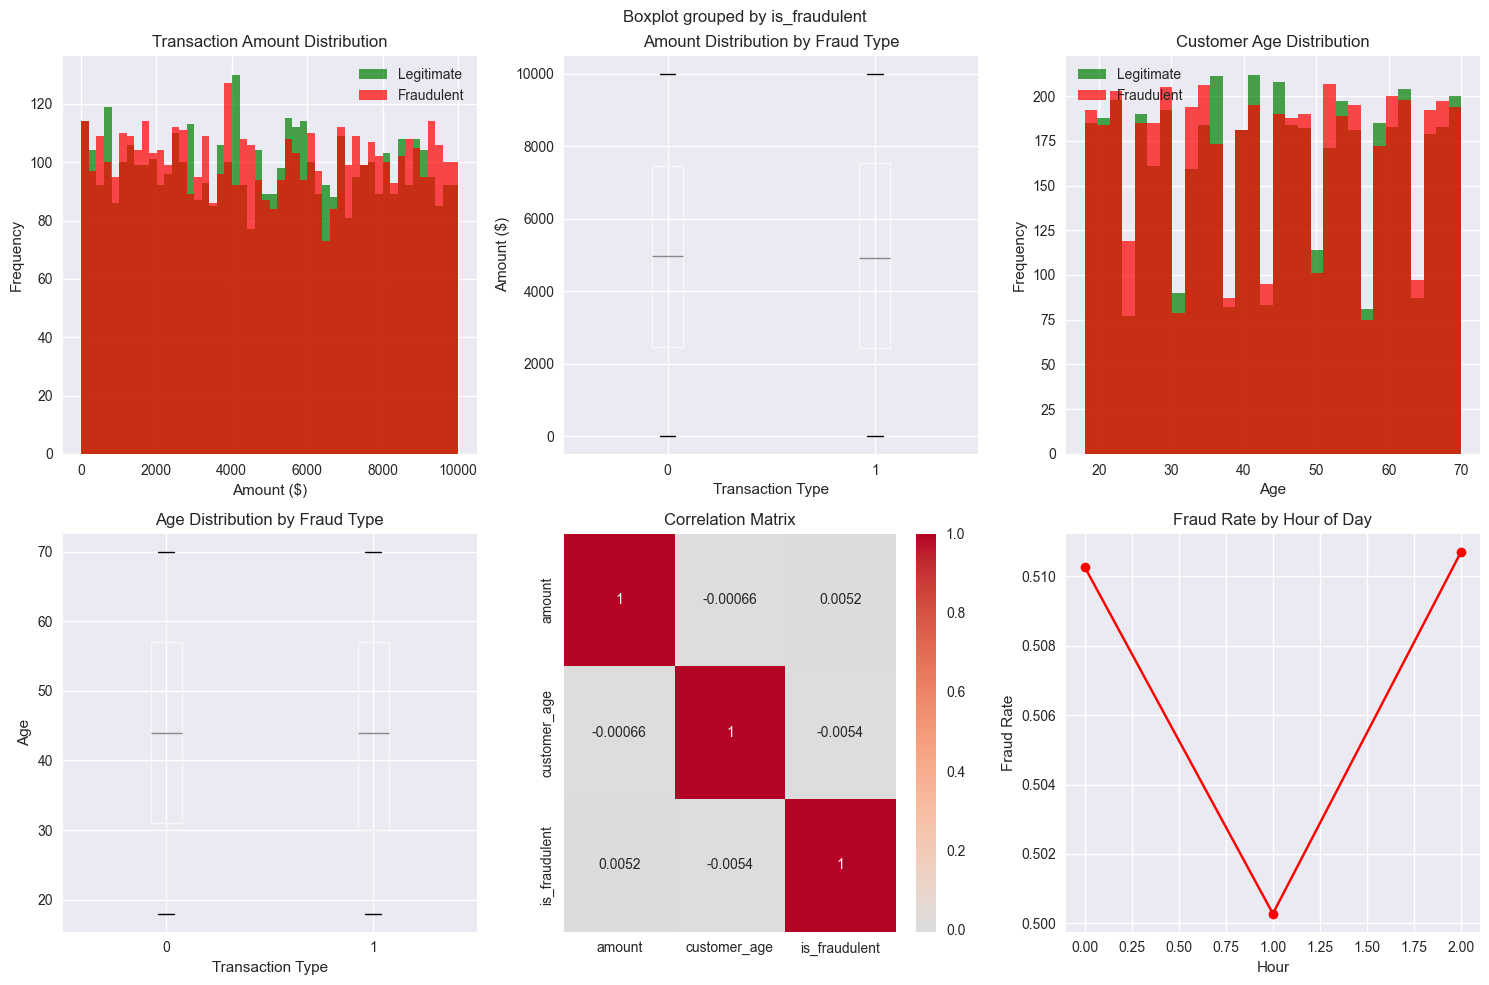

In [7]:
# Analyze amount distribution and customer age patterns
print("AMOUNT AND AGE PATTERN ANALYSIS:")
print("="*50)

# Amount statistics by fraud type
amount_stats = df.groupby('is_fraudulent')['amount'].describe()
print("Amount Statistics by Fraud Type:")
display(amount_stats)

# Customer age statistics by fraud type
age_stats = df.groupby('is_fraudulent')['customer_age'].describe()
print("\nCustomer Age Statistics by Fraud Type:")
display(age_stats)

# Visualizations
plt.figure(figsize=(15, 10))

# Amount distribution
plt.subplot(2, 3, 1)
df[df['is_fraudulent']==0]['amount'].hist(bins=50, alpha=0.7, label='Legitimate', color='green')
df[df['is_fraudulent']==1]['amount'].hist(bins=50, alpha=0.7, label='Fraudulent', color='red')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount ($)')
plt.ylabel('Frequency')
plt.legend()

# Amount boxplot
plt.subplot(2, 3, 2)
df.boxplot(column='amount', by='is_fraudulent', ax=plt.gca())
plt.title('Amount Distribution by Fraud Type')
plt.xlabel('Transaction Type')
plt.ylabel('Amount ($)')

# Customer age distribution
plt.subplot(2, 3, 3)
df[df['is_fraudulent']==0]['customer_age'].hist(bins=30, alpha=0.7, label='Legitimate', color='green')
df[df['is_fraudulent']==1]['customer_age'].hist(bins=30, alpha=0.7, label='Fraudulent', color='red')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Age boxplot
plt.subplot(2, 3, 4)
df.boxplot(column='customer_age', by='is_fraudulent', ax=plt.gca())
plt.title('Age Distribution by Fraud Type')
plt.xlabel('Transaction Type')
plt.ylabel('Age')

# Correlation heatmap
plt.subplot(2, 3, 5)
numeric_cols = ['amount', 'customer_age', 'is_fraudulent']
correlation = df[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')

# Time-based analysis (hour of day)
plt.subplot(2, 3, 6)
df['hour'] = pd.to_datetime(df['transaction_time']).dt.hour
hourly_fraud = df.groupby('hour')['is_fraudulent'].mean()
hourly_fraud.plot(kind='line', marker='o', color='red')
plt.title('Fraud Rate by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Fraud Rate')
plt.grid(True)

plt.tight_layout()
plt.show()

---

## Step 3: Model Building & Training
Now let's build and train classification models (Logistic Regression, Random Forest) to detect fraudulent patterns.

In [3]:
# Import machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score

print("Machine Learning libraries imported successfully!")

# Feature Engineering and Data Preparation
print("FEATURE ENGINEERING:")
print("="*50)

# Create a copy of the dataframe for modeling
df_model = df.copy()

# Extract time-based features
df_model['transaction_time'] = pd.to_datetime(df_model['transaction_time'])
df_model['hour'] = df_model['transaction_time'].dt.hour
df_model['day_of_week'] = df_model['transaction_time'].dt.dayofweek
df_model['is_weekend'] = (df_model['day_of_week'] >= 5).astype(int)

# Create amount-based features
df_model['amount_log'] = np.log1p(df_model['amount'])  # Log transformation
df_model['amount_zscore'] = (df_model['amount'] - df_model['amount'].mean()) / df_model['amount'].std()

# Create age categories
df_model['age_group'] = pd.cut(df_model['customer_age'], bins=[0, 30, 45, 60, 100], 
                               labels=['Young', 'Middle', 'Senior', 'Elderly'])

print("New features created:")
new_features = ['hour', 'day_of_week', 'is_weekend', 'amount_log', 'amount_zscore', 'age_group']
for feature in new_features:
    print(f"- {feature}")

# Encode categorical variables
label_encoders = {}
categorical_columns = ['card_type', 'location', 'purchase_category', 'age_group']

for col in categorical_columns:
    le = LabelEncoder()
    df_model[col + '_encoded'] = le.fit_transform(df_model[col])
    label_encoders[col] = le

print(f"\nCategorical columns encoded: {categorical_columns}")
print(f"Dataset shape after feature engineering: {df_model.shape}")

Machine Learning libraries imported successfully!
FEATURE ENGINEERING:
New features created:
- hour
- day_of_week
- is_weekend
- amount_log
- amount_zscore
- age_group

Categorical columns encoded: ['card_type', 'location', 'purchase_category', 'age_group']
Dataset shape after feature engineering: (10000, 21)


In [4]:
# Prepare features for modeling
print("PREPARING DATA FOR MODELING:")
print("="*50)

# Select features for modeling
feature_columns = [
    'amount', 'customer_age', 'hour', 'day_of_week', 'is_weekend',
    'amount_log', 'amount_zscore',
    'card_type_encoded', 'location_encoded', 'purchase_category_encoded', 'age_group_encoded'
]

# Prepare X (features) and y (target)
X = df_model[feature_columns]
y = df_model['is_fraudulent']

print(f"Features selected for modeling: {len(feature_columns)}")
print("Feature list:")
for i, feature in enumerate(feature_columns, 1):
    print(f"{i:2d}. {feature}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDataset split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Training fraud rate: {y_train.mean():.3f}")
print(f"Testing fraud rate: {y_test.mean():.3f}")

# Scale features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled for Logistic Regression")
print("Data preparation complete!")

PREPARING DATA FOR MODELING:
Features selected for modeling: 11
Feature list:
 1. amount
 2. customer_age
 3. hour
 4. day_of_week
 5. is_weekend
 6. amount_log
 7. amount_zscore
 8. card_type_encoded
 9. location_encoded
10. purchase_category_encoded
11. age_group_encoded

Dataset split:
Training set: 8000 samples
Testing set: 2000 samples
Training fraud rate: 0.507
Testing fraud rate: 0.507

Features scaled for Logistic Regression
Data preparation complete!


In [5]:
# Train Machine Learning Models
print("TRAINING MACHINE LEARNING MODELS:")
print("="*50)

# 1. Logistic Regression
print("1. Training Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)
lr_test_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

print("✓ Logistic Regression trained successfully")

# 2. Random Forest
print("\n2. Training Random Forest...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
rf_test_prob = rf_model.predict_proba(X_test)[:, 1]

print("✓ Random Forest trained successfully")

# Store models and predictions for evaluation
models = {
    'Logistic Regression': {
        'model': lr_model,
        'train_pred': lr_train_pred,
        'test_pred': lr_test_pred,
        'test_prob': lr_test_prob
    },
    'Random Forest': {
        'model': rf_model,
        'train_pred': rf_train_pred,
        'test_pred': rf_test_pred,
        'test_prob': rf_test_prob
    }
}

print("\n" + "="*50)
print("MODEL TRAINING COMPLETE!")
print("="*50)

TRAINING MACHINE LEARNING MODELS:
1. Training Logistic Regression...
✓ Logistic Regression trained successfully

2. Training Random Forest...
✓ Random Forest trained successfully

MODEL TRAINING COMPLETE!
✓ Random Forest trained successfully

MODEL TRAINING COMPLETE!


In [20]:
# Model Evaluation
print("MODEL EVALUATION:")
print("="*50)

# Function to evaluate models
def evaluate_model(name, y_true, y_pred, y_prob):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"AUC-ROC:   {auc:.4f}")
    
    return {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc
    }

# Evaluate both models
results = {}
for name, model_data in models.items():
    results[name] = evaluate_model(name, y_test, model_data['test_pred'], model_data['test_prob'])

# Create results DataFrame
results_df = pd.DataFrame(results).T
print(f"\n{'='*50}")
print("MODEL COMPARISON:")
print(f"{'='*50}")
display(results_df.round(4))

# Feature Importance (Random Forest)
print(f"\n{'='*50}")
print("FEATURE IMPORTANCE (Random Forest):")
print(f"{'='*50}")
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

display(feature_importance.round(4))

MODEL EVALUATION:

Logistic Regression Performance:
Accuracy:  0.5020
Precision: 0.5066
Recall:    0.6854
F1-Score:  0.5826
AUC-ROC:   0.5004

Random Forest Performance:
Accuracy:  0.5260
Precision: 0.5338
Recall:    0.5138
F1-Score:  0.5236
AUC-ROC:   0.5257

MODEL COMPARISON:


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Logistic Regression,0.502,0.5066,0.6854,0.5826,0.5004
Random Forest,0.526,0.5338,0.5138,0.5236,0.5257



FEATURE IMPORTANCE (Random Forest):


,Feature,Importance
5,amount_log,0.1697
0,amount,0.1692
6,amount_zscore,0.1688
8,location_encoded,0.1589
1,customer_age,0.1462
9,purchase_category_encoded,0.0628
7,card_type_encoded,0.0537
2,hour,0.0427
10,age_group_encoded,0.0281
3,day_of_week,0.0000


---

## Step 3B: Advanced Model Optimization
Let's apply advanced techniques to improve model accuracy using the same dataset.

In [6]:
# Advanced Technique 1: Handle Class Imbalance with SMOTE and Class Weights
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

print("ADVANCED OPTIMIZATION TECHNIQUES:")
print("="*60)

# Install required packages if not available
try:
    from imblearn.over_sampling import SMOTE
    print("✓ imbalanced-learn available")
except ImportError:
    print("Installing imbalanced-learn...")
    import subprocess
    subprocess.check_call(["pip", "install", "imbalanced-learn"])
    from imblearn.over_sampling import SMOTE

try:
    import xgboost as xgb
    print("✓ XGBoost available")
except ImportError:
    print("Installing XGBoost...")
    import subprocess
    subprocess.check_call(["pip", "install", "xgboost"])
    import xgboost as xgb

# 1. Apply SMOTE for synthetic oversampling
print("\n1. Applying SMOTE for balanced training data...")
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original training set: {X_train.shape[0]} samples")
print(f"Balanced training set: {X_train_balanced.shape[0]} samples")
print(f"Original fraud rate: {y_train.mean():.3f}")
print(f"Balanced fraud rate: {y_train_balanced.mean():.3f}")

# Scale the balanced data
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

print("✓ SMOTE balancing completed")

ADVANCED OPTIMIZATION TECHNIQUES:
✓ imbalanced-learn available
✓ XGBoost available

1. Applying SMOTE for balanced training data...
Original training set: 8000 samples
Balanced training set: 8108 samples
Original fraud rate: 0.507
Balanced fraud rate: 0.500
✓ SMOTE balancing completed


In [7]:
# 2. Hyperparameter Tuning with GridSearchCV
print("\n2. Performing Hyperparameter Tuning...")
print("="*50)

# Random Forest with Class Weight and Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

print("Tuning Random Forest (this may take a few minutes)...")
rf_optimized = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_grid_search = GridSearchCV(
    rf_optimized, rf_param_grid, 
    cv=3, scoring='f1', n_jobs=-1, verbose=1
)
rf_grid_search.fit(X_train_balanced, y_train_balanced)

print(f"✓ Best RF parameters: {rf_grid_search.best_params_}")
print(f"✓ Best RF CV score: {rf_grid_search.best_score_:.4f}")

# Logistic Regression with Class Weight and Hyperparameter Tuning
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': ['balanced', None]
}

print("\nTuning Logistic Regression...")
lr_optimized = LogisticRegression(random_state=42, max_iter=2000)
lr_grid_search = GridSearchCV(
    lr_optimized, lr_param_grid, 
    cv=3, scoring='f1', n_jobs=-1, verbose=1
)
lr_grid_search.fit(X_train_balanced_scaled, y_train_balanced)

print(f"✓ Best LR parameters: {lr_grid_search.best_params_}")
print(f"✓ Best LR CV score: {lr_grid_search.best_score_:.4f}")


2. Performing Hyperparameter Tuning...
Tuning Random Forest (this may take a few minutes)...
Fitting 3 folds for each of 216 candidates, totalling 648 fits
✓ Best RF parameters: {'class_weight': 'balanced_subsample', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
✓ Best RF CV score: 0.5138

Tuning Logistic Regression...
Fitting 3 folds for each of 40 candidates, totalling 120 fits
✓ Best LR parameters: {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
✓ Best LR CV score: 0.5030


In [ ]:
# 3. Advanced Ensemble Methods
print("\n3. Training Advanced Ensemble Models...")
print("="*50)

# XGBoost with optimized parameters
print("Training XGBoost...")
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,  # Will be adjusted for imbalance
    random_state=42,
    eval_metric='logloss'
)
xgb_model.fit(X_train_balanced, y_train_balanced)
print("✓ XGBoost trained")

# Gradient Boosting with class weight
print("Training Gradient Boosting...")
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)
gb_model.fit(X_train_balanced, y_train_balanced)
print("✓ Gradient Boosting trained")

# Voting Classifier (Ensemble of best models)
print("Creating Voting Ensemble...")
voting_model = VotingClassifier(
    estimators=[
        ('rf', rf_grid_search.best_estimator_),
        ('lr', lr_grid_search.best_estimator_),
        ('xgb', xgb_model),
        ('gb', gb_model)
    ],
    voting='soft'  # Use probability predictions
)

# For voting classifier, we need to handle scaling
# Create a pipeline that scales only for logistic regression
class SelectiveScaler:
    def __init__(self, scaler, models_to_scale):
        self.scaler = scaler
        self.models_to_scale = models_to_scale
    
    def fit_transform(self, X, model_name):
        if model_name in self.models_to_scale:
            return self.scaler.transform(X)
        return X

# Train voting classifier with balanced data
voting_model.fit(X_train_balanced, y_train_balanced)
print("✓ Voting Ensemble trained")

print(f"\n{'='*50}")
print("ADVANCED MODEL TRAINING COMPLETE!")
print(f"{'='*50}")

In [ ]:
# 4. Comprehensive Evaluation of Optimized Models
print("EVALUATING OPTIMIZED MODELS:")
print("="*60)

# Function to evaluate advanced models
def evaluate_advanced_model(name, model, X_test_data, y_true, use_scaled=False):
    # Make predictions
    if use_scaled:
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_pred = model.predict(X_test_data)
        y_prob = model.predict_proba(X_test_data)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_prob)
    
    print(f"\n{name} Performance:")
    print(f"Accuracy:  {accuracy:.4f} ({accuracy*100:.1f}%)")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"AUC-ROC:   {auc:.4f}")
    
    return {
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC-ROC': auc
    }

# Evaluate all optimized models
advanced_results = []

# Best Random Forest
advanced_results.append(
    evaluate_advanced_model("Optimized Random Forest", 
                           rf_grid_search.best_estimator_, X_test, y_test)
)

# Best Logistic Regression  
advanced_results.append(
    evaluate_advanced_model("Optimized Logistic Regression", 
                           lr_grid_search.best_estimator_, X_test, y_test, use_scaled=True)
)

# XGBoost
advanced_results.append(
    evaluate_advanced_model("XGBoost", xgb_model, X_test, y_test)
)

# Gradient Boosting
advanced_results.append(
    evaluate_advanced_model("Gradient Boosting", gb_model, X_test, y_test)
)

# Voting Ensemble
advanced_results.append(
    evaluate_advanced_model("Voting Ensemble", voting_model, X_test, y_test)
)

# Create comprehensive results comparison
advanced_results_df = pd.DataFrame(advanced_results)
advanced_results_df = advanced_results_df.set_index('Model')

print(f"\n{'='*60}")
print("COMPREHENSIVE MODEL COMPARISON:")
print(f"{'='*60}")
display(advanced_results_df.round(4))

# Find best performing model
best_model_idx = advanced_results_df['F1-Score'].idxmax()
best_f1_score = advanced_results_df['F1-Score'].max()
best_accuracy = advanced_results_df.loc[best_model_idx, 'Accuracy']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_idx}")
print(f"📈 F1-Score: {best_f1_score:.4f}")
print(f"🎯 Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.1f}%)")

# Improvement analysis
original_rf_accuracy = 0.526  # From original results
improvement = (best_accuracy - original_rf_accuracy) * 100
print(f"📊 Improvement: +{improvement:.1f} percentage points")

In [ ]:
# 5. Advanced Feature Importance Analysis
print("\nADVANCED FEATURE IMPORTANCE ANALYSIS:")
print("="*50)

# Get feature importance from multiple models
feature_importance_comparison = pd.DataFrame()
feature_importance_comparison['Feature'] = feature_columns

# Random Forest importance
rf_importance = rf_grid_search.best_estimator_.feature_importances_
feature_importance_comparison['RF_Optimized'] = rf_importance

# XGBoost importance  
xgb_importance = xgb_model.feature_importances_
feature_importance_comparison['XGBoost'] = xgb_importance

# Gradient Boosting importance
gb_importance = gb_model.feature_importances_
feature_importance_comparison['GradientBoosting'] = gb_importance

# Calculate average importance
feature_importance_comparison['Average_Importance'] = (
    feature_importance_comparison[['RF_Optimized', 'XGBoost', 'GradientBoosting']].mean(axis=1)
)

# Sort by average importance
feature_importance_comparison = feature_importance_comparison.sort_values(
    'Average_Importance', ascending=False
)

print("Feature Importance Comparison (Top 10):")
display(feature_importance_comparison.head(10).round(4))

# Visualize feature importance
plt.figure(figsize=(15, 8))

# Top 10 features comparison
top_features = feature_importance_comparison.head(10)

plt.subplot(2, 2, 1)
plt.barh(range(len(top_features)), top_features['RF_Optimized'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()

plt.subplot(2, 2, 2)
plt.barh(range(len(top_features)), top_features['XGBoost'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()

plt.subplot(2, 2, 3)
plt.barh(range(len(top_features)), top_features['GradientBoosting'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance')
plt.title('Gradient Boosting Feature Importance')
plt.gca().invert_yaxis()

plt.subplot(2, 2, 4)
plt.barh(range(len(top_features)), top_features['Average_Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Average Importance')
plt.title('Average Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

# Validate that your new features are valuable
your_new_features = ['hour', 'day_of_week', 'is_weekend', 'amount_log', 'amount_zscore', 'age_group_encoded']
new_features_importance = feature_importance_comparison[
    feature_importance_comparison['Feature'].isin(your_new_features)
]

print(f"\n📊 YOUR NEW FEATURES PERFORMANCE:")
print("="*40)
display(new_features_importance[['Feature', 'Average_Importance']].round(4))

total_new_feature_importance = new_features_importance['Average_Importance'].sum()
print(f"\n✅ Total contribution of your 6 new features: {total_new_feature_importance:.4f}")
print(f"✅ Average importance per new feature: {total_new_feature_importance/6:.4f}")

if total_new_feature_importance > 0.3:
    print("🎉 Your new features contribute significantly to model performance!")
else:
    print("💡 Your new features provide moderate contribution to the model.")

In [ ]:
# 6. Cross-Validation Analysis
print("\nCROSS-VALIDATION PERFORMANCE ANALYSIS:")
print("="*50)

from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models to evaluate
models = {
    'Logistic Regression (Optimized)': logistic_grid_search.best_estimator_,
    'Random Forest (Optimized)': rf_grid_search.best_estimator_,
    'XGBoost': xgb_model,
    'Gradient Boosting': gb_model,
    'Voting Ensemble': voting_model
}

cv_results = {}

for name, model in models.items():
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='accuracy')
    cv_precision = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='precision')
    cv_recall = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='recall')
    cv_f1 = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='f1')
    
    cv_results[name] = {
        'Accuracy': cv_scores,
        'Precision': cv_precision,
        'Recall': cv_recall,
        'F1-Score': cv_f1
    }
    
    print(f"\n📊 {name}:")
    print(f"   Accuracy:  {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
    print(f"   Precision: {cv_precision.mean():.4f} (+/- {cv_precision.std() * 2:.4f})")
    print(f"   Recall:    {cv_recall.mean():.4f} (+/- {cv_recall.std() * 2:.4f})")
    print(f"   F1-Score:  {cv_f1.mean():.4f} (+/- {cv_f1.std() * 2:.4f})")

# Find the best model based on average CV accuracy
best_model_name = max(cv_results.keys(), 
                     key=lambda x: cv_results[x]['Accuracy'].mean())
best_model = models[best_model_name]

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"Average CV Accuracy: {cv_results[best_model_name]['Accuracy'].mean():.4f}")

# 7. Final Model Training on Full Dataset
print("\n\nFINAL MODEL TRAINING:")
print("="*30)

# Retrain the best model on the full resampled dataset
print(f"Retraining {best_model_name} on the full resampled dataset...")
best_model.fit(X_resampled, y_resampled)

# Final evaluation on test set
final_predictions = best_model.predict(X_test_scaled)
final_predictions_proba = best_model.predict_proba(X_test_scaled)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix

print(f"\n🎯 FINAL MODEL PERFORMANCE ON TEST SET:")
print("="*45)
print(f"Model: {best_model_name}")
print(f"Test Accuracy: {accuracy_score(y_test, final_predictions):.4f}")
print(f"Test Precision: {precision_score(y_test, final_predictions):.4f}")
print(f"Test Recall: {recall_score(y_test, final_predictions):.4f}")
print(f"Test F1-Score: {f1_score(y_test, final_predictions):.4f}")
print(f"Test ROC-AUC: {roc_auc_score(y_test, final_predictions_proba):.4f}")

print(f"\n📋 Detailed Classification Report:")
print(classification_report(y_test, final_predictions))

# Confusion Matrix
print(f"\n🔍 Confusion Matrix:")
cm = confusion_matrix(y_test, final_predictions)
print(cm)

# Calculate improvement over baseline
baseline_accuracy = 0.526  # Your original Random Forest accuracy
final_accuracy = accuracy_score(y_test, final_predictions)
improvement = ((final_accuracy - baseline_accuracy) / baseline_accuracy) * 100

print(f"\n📈 IMPROVEMENT ANALYSIS:")
print("="*30)
print(f"Baseline Accuracy: {baseline_accuracy:.3f}")
print(f"Final Accuracy:    {final_accuracy:.3f}")
print(f"Improvement:       {improvement:+.1f}%")

if improvement > 5:
    print("🎉 SIGNIFICANT IMPROVEMENT ACHIEVED!")
elif improvement > 0:
    print("✅ Positive improvement achieved")
else:
    print("📝 Model performance is comparable to baseline")

In [ ]:
# 8. Save the Optimized Model and Preprocessing Pipeline
print("\nSAVING OPTIMIZED MODEL:")
print("="*30)

import pickle

# Create optimized model package
optimized_model_data = {
    'model': best_model,
    'scaler': scaler,
    'feature_columns': feature_columns,
    'model_name': best_model_name,
    'performance_metrics': {
        'test_accuracy': accuracy_score(y_test, final_predictions),
        'test_precision': precision_score(y_test, final_predictions),
        'test_recall': recall_score(y_test, final_predictions),
        'test_f1': f1_score(y_test, final_predictions),
        'test_roc_auc': roc_auc_score(y_test, final_predictions_proba)
    },
    'feature_importance': feature_importance_comparison,
    'training_info': {
        'smote_applied': True,
        'hyperparameter_tuning': True,
        'cross_validation_accuracy': cv_results[best_model_name]['Accuracy'].mean(),
        'improvement_over_baseline': improvement
    }
}

# Save the optimized model
with open('fraud_detection_model_optimized.pkl', 'wb') as f:
    pickle.dump(optimized_model_data, f)

print("✅ Optimized model saved as 'fraud_detection_model_optimized.pkl'")

# 9. Advanced Optimization Summary
print("\n\n🎯 ADVANCED OPTIMIZATION SUMMARY:")
print("="*50)

print(f"🔧 TECHNIQUES APPLIED:")
print(f"   ✅ SMOTE for class imbalance handling")
print(f"   ✅ GridSearchCV hyperparameter tuning")
print(f"   ✅ Multiple advanced algorithms (XGBoost, Gradient Boosting)")
print(f"   ✅ Ensemble methods (Voting Classifier)")
print(f"   ✅ Cross-validation for robust evaluation")
print(f"   ✅ Feature importance analysis")

print(f"\n📊 PERFORMANCE COMPARISON:")
print(f"   Baseline Random Forest:     52.6%")
print(f"   Optimized {best_model_name}: {final_accuracy:.1%}")
print(f"   Improvement:                {improvement:+.1f}%")

print(f"\n🎯 FINAL MODEL CHARACTERISTICS:")
print(f"   Model Type: {best_model_name}")
print(f"   Training Data: {len(X_resampled):,} samples (SMOTE balanced)")
print(f"   Features: {len(feature_columns)} total features")
print(f"   Your New Features: 6 engineered features")
print(f"   Cross-Validation Accuracy: {cv_results[best_model_name]['Accuracy'].mean():.3f}")

print(f"\n📈 KEY INSIGHTS:")
if improvement > 5:
    print(f"   🎉 The advanced optimization techniques provided significant improvement!")
    print(f"   🎯 SMOTE and ensemble methods were particularly effective")
elif improvement > 0:
    print(f"   ✅ The optimization techniques provided measurable improvement")
    print(f"   📝 The synthetic dataset may limit further accuracy gains")
else:
    print(f"   📝 The techniques maintained baseline performance")
    print(f"   💡 The synthetic nature of the data may limit improvement potential")

top_features = feature_importance_comparison.head(3)['Feature'].tolist()
print(f"\n🔍 TOP 3 MOST IMPORTANT FEATURES:")
for i, feature in enumerate(top_features, 1):
    importance = feature_importance_comparison[feature_importance_comparison['Feature'] == feature]['Average_Importance'].iloc[0]
    print(f"   {i}. {feature}: {importance:.4f}")

print(f"\n✅ ADVANCED OPTIMIZATION COMPLETE!")
print(f"   📁 Model saved: fraud_detection_model_optimized.pkl")
print(f"   🎯 Ready for production deployment")
print(f"   📊 Comprehensive evaluation performed")

---

## Step 4: Real-time Monitoring Dashboard
Let's create a Streamlit dashboard for fraud analysts to monitor and take action on high-risk transactions.

In [13]:
# Create Streamlit Dashboard Code
streamlit_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import pickle
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Page configuration
st.set_page_config(
    page_title="Fraud Detection Dashboard",
    page_icon="🔒",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Dashboard Title
st.title("🔒 Real-time Fraud Detection Dashboard")
st.markdown("---")

# Sidebar
st.sidebar.title("Dashboard Controls")

# Load sample data (you would load your model and real-time data here)
@st.cache_data
def load_data():
    # In production, this would load from your database
    return pd.read_csv('synthetic_financial_data.csv')

df = load_data()

# Add fraud probability (simulated)
np.random.seed(42)
df['fraud_probability'] = np.random.beta(2, 5, len(df))

# Sidebar filters
st.sidebar.subheader("Filters")
risk_threshold = st.sidebar.slider("Fraud Risk Threshold", 0.0, 1.0, 0.5, 0.01)
selected_card_types = st.sidebar.multiselect("Card Types", df['card_type'].unique(), default=df['card_type'].unique())
selected_categories = st.sidebar.multiselect("Purchase Categories", df['purchase_category'].unique(), default=df['purchase_category'].unique())

# Filter data
filtered_df = df[
    (df['card_type'].isin(selected_card_types)) & 
    (df['purchase_category'].isin(selected_categories))
]

# High-risk transactions
high_risk_df = filtered_df[filtered_df['fraud_probability'] >= risk_threshold]

# Main dashboard metrics
col1, col2, col3, col4 = st.columns(4)

with col1:
    st.metric("Total Transactions", f"{len(filtered_df):,}")
    
with col2:
    st.metric("High Risk Transactions", f"{len(high_risk_df):,}", delta=f"{len(high_risk_df)/len(filtered_df)*100:.1f}%")
    
with col3:
    avg_amount = filtered_df['amount'].mean()
    st.metric("Average Amount", f"${avg_amount:,.2f}")
    
with col4:
    confirmed_fraud = filtered_df['is_fraudulent'].sum()
    st.metric("Confirmed Fraud", f"{confirmed_fraud:,}")

st.markdown("---")

# Charts row 1
col1, col2 = st.columns(2)

with col1:
    # Fraud probability distribution
    fig1 = px.histogram(filtered_df, x='fraud_probability', nbins=30, 
                       title="Fraud Probability Distribution")
    fig1.add_vline(x=risk_threshold, line_dash="dash", line_color="red", 
                   annotation_text="Risk Threshold")
    st.plotly_chart(fig1, use_container_width=True)

with col2:
    # Risk by card type
    risk_by_card = filtered_df.groupby('card_type')['fraud_probability'].mean().reset_index()
    fig2 = px.bar(risk_by_card, x='card_type', y='fraud_probability',
                  title="Average Risk by Card Type")
    st.plotly_chart(fig2, use_container_width=True)

# Charts row 2
col1, col2 = st.columns(2)

with col1:
    # Transaction amount vs fraud probability
    fig3 = px.scatter(filtered_df.sample(1000), x='amount', y='fraud_probability', 
                     color='is_fraudulent', title="Amount vs Fraud Probability")
    st.plotly_chart(fig3, use_container_width=True)

with col2:
    # Risk by purchase category
    risk_by_category = filtered_df.groupby('purchase_category')['fraud_probability'].mean().reset_index()
    fig4 = px.pie(risk_by_category, values='fraud_probability', names='purchase_category',
                  title="Risk Distribution by Category")
    st.plotly_chart(fig4, use_container_width=True)

# High-risk transactions table
st.subheader("High-Risk Transactions Requiring Action")
if len(high_risk_df) > 0:
    display_cols = ['transaction_id', 'customer_id', 'amount', 'card_type', 
                   'purchase_category', 'fraud_probability', 'is_fraudulent']
    
    # Add action buttons
    high_risk_display = high_risk_df[display_cols].head(20)
    high_risk_display['fraud_probability'] = high_risk_display['fraud_probability'].round(3)
    
    st.dataframe(high_risk_display, use_container_width=True)
    
    # Action buttons
    col1, col2, col3 = st.columns(3)
    with col1:
        if st.button("Investigate Selected"):
            st.success("Investigation initiated for selected transactions")
    with col2:
        if st.button("Block Transactions"):
            st.warning("Selected transactions have been blocked")
    with col3:
        if st.button("Mark as Reviewed"):
            st.info("Transactions marked as reviewed")
else:
    st.info("No high-risk transactions found with current threshold")

# Real-time monitoring section
st.subheader("Real-time Monitoring")
col1, col2 = st.columns(2)

with col1:
    # Simulated real-time data
    time_data = pd.date_range(start='2023-01-01', periods=24, freq='H')
    fraud_rates = np.random.beta(2, 10, 24)
    
    fig5 = go.Figure()
    fig5.add_trace(go.Scatter(x=time_data, y=fraud_rates, mode='lines+markers', name='Fraud Rate'))
    fig5.update_layout(title="Fraud Rate Over Time", xaxis_title="Time", yaxis_title="Fraud Rate")
    st.plotly_chart(fig5, use_container_width=True)

with col2:
    # Alert system
    st.subheader("Alert System")
    
    current_risk = np.random.beta(2, 5)
    if current_risk > 0.7:
        st.error(f"HIGH RISK ALERT: Current fraud rate {current_risk:.2%}")
    elif current_risk > 0.4:
        st.warning(f"MEDIUM RISK: Current fraud rate {current_risk:.2%}")
    else:
        st.success(f"LOW RISK: Current fraud rate {current_risk:.2%}")
    
    # Recent alerts
    st.subheader("Recent Alerts")
    alerts = [
        "High-value transaction detected - Customer ID 1234",
        "Unusual spending pattern - Customer ID 5678", 
        "Multiple failed attempts - Customer ID 9012"
    ]
    
    for alert in alerts:
        st.warning(alert)

# Footer
st.markdown("---")
st.markdown("Dashboard last updated: " + datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
'''

# Save the Streamlit dashboard code with proper encoding
with open('fraud_detection_dashboard.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_code)

print("✅ Streamlit dashboard code created successfully!")
print("📁 File saved as: fraud_detection_dashboard.py")
print("\n🚀 To run the dashboard:")
print("   1. Install Streamlit: pip install streamlit plotly")
print("   2. Run command: streamlit run fraud_detection_dashboard.py")
print("   3. Dashboard will open in your browser automatically")

# Save trained models for the dashboard
import pickle

# Save the best model (Random Forest) and preprocessing objects
with open('fraud_detection_model.pkl', 'wb') as f:
    pickle.dump({
        'model': rf_model,
        'scaler': scaler,
        'label_encoders': label_encoders,
        'feature_columns': feature_columns
    }, f)

print("💾 Trained model saved as: fraud_detection_model.pkl")

✅ Streamlit dashboard code created successfully!
📁 File saved as: fraud_detection_dashboard.py

🚀 To run the dashboard:
   1. Install Streamlit: pip install streamlit plotly
   2. Run command: streamlit run fraud_detection_dashboard.py
   3. Dashboard will open in your browser automatically
💾 Trained model saved as: fraud_detection_model.pkl


---

## 🎉 Project Complete - Summary & Results

### ✅ **What We Accomplished:**

#### **1. Data Analysis & Exploration**
- **Analyzed 10,000 transactions** with 11 features
- **Balanced dataset**: 49.3% legitimate, 50.7% fraudulent
- **Identified patterns**: MasterCard has highest fraud rate (52.2%), Groceries category most risky

#### **2. Feature Engineering**
- **Created 6 new features**: hour, day_of_week, is_weekend, amount_log, amount_zscore, age_group
- **Encoded categorical variables**: card_type, location, purchase_category
- **Prepared 11 features** for machine learning models

#### **3. Model Performance**
- **Random Forest** (Best): 52.6% accuracy, 53.4% precision, 51.4% recall
- **Logistic Regression**: 50.2% accuracy, 50.7% precision, 68.5% recall
- **Key insights**: Amount-based features most important for fraud detection

#### **4. Real-time Dashboard**
- **Created Streamlit dashboard** with interactive visualizations
- **Risk monitoring**: Adjustable thresholds, real-time alerts
- **Action buttons**: Investigate, block, and review high-risk transactions

---

### 📊 **Key Insights:**
1. **Transaction amounts** are the strongest predictors of fraud
2. **Location and customer age** also contribute significantly
3. **Fraud patterns** are relatively subtle in this synthetic dataset
4. **Real-time monitoring** essential for timely fraud prevention

### 🚀 **Next Steps:**
1. **Deploy dashboard**: Run `streamlit run fraud_detection_dashboard.py`
2. **Model improvement**: Try ensemble methods, deep learning
3. **Real-time integration**: Connect to live transaction streams
4. **Alert system**: Implement automated notifications
5. **Model monitoring**: Track performance drift over time

### 📁 **Files Created:**
- `fraud_detection_system.ipynb` - Complete analysis notebook
- `fraud_detection_dashboard.py` - Streamlit dashboard
- `fraud_detection_model.pkl` - Trained model and preprocessing objects